In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import sklearn as metrics
from sklearn import svm

In [2]:
df = pd.read_excel(r"C:\Users\shahd\OneDrive - Northeastern University\Documents\MPS ANALYTICS\Winter Q3\ALY 6020\Projects\Week 3\marketing_campaign.xlsx")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## Data Cleaning and Transformations
### Continuous Variables

In [4]:
df = df.drop(columns=['Z_CostContact','Z_Revenue','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',])

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

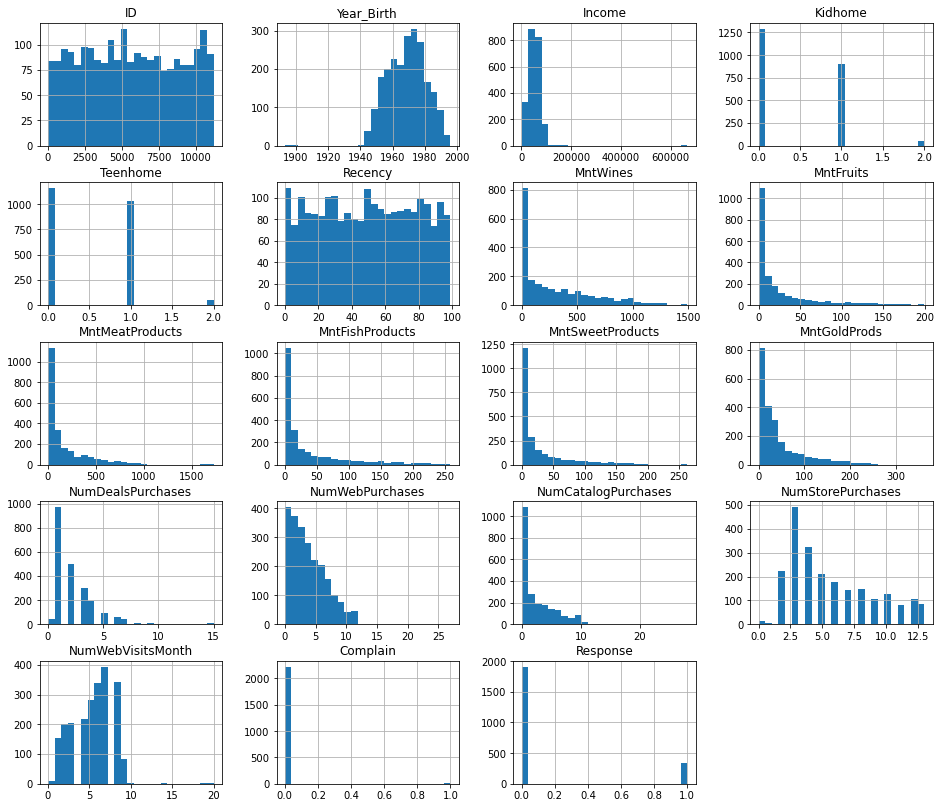

In [7]:
df.hist(figsize=(16,14),bins=25);

Since the distribution is skewed towards the right along with some outliers. We will impute the null values using Median to avoid the outlier values to affect the imputation.

In [8]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [9]:
Day=[]
Month=[]
Year=[]
for _ in df['Dt_Customer']:
    _=_.split('-')
    Month.append(int(_[1]))
    Year.append(int(_[0]))
    Day.append(int(_[2]))
df=pd.concat([df.drop(columns=['Dt_Customer']),pd.DataFrame(Day,columns=['Day']),
                pd.DataFrame(Month,columns=['Month']),pd.DataFrame(Year,columns=['Year'])],axis=1)

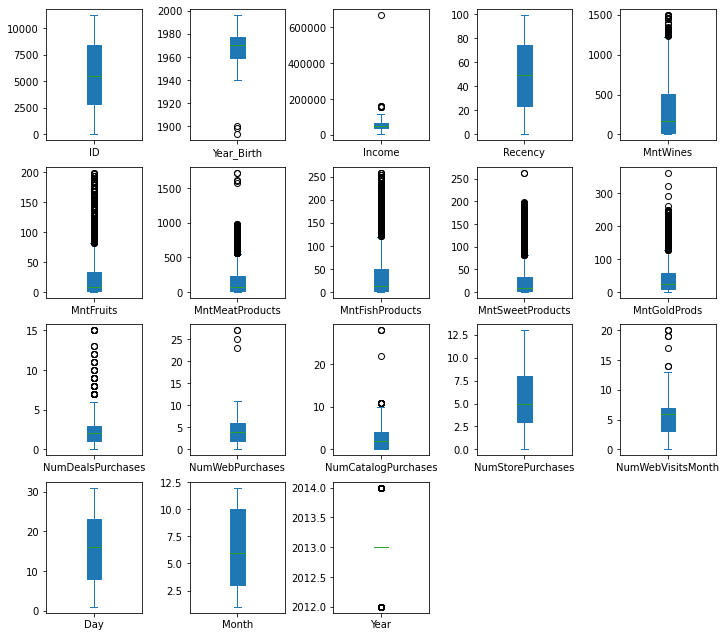

In [10]:
df_outliers = df.drop(columns=['Kidhome','Teenhome','Complain','Response','Education','Marital_Status'])
df_outliers.plot(subplots=True,layout=(5,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [11]:
for col in df_outliers.columns:
    Q3, Q1 = np.percentile(df_outliers[col], [75 ,25])
    IQR = Q3 - Q1
    outlier = Q3 + (1.5*IQR)
    print("Outlier threshold for %s is %d" %(col,outlier))

Outlier threshold for ID is 16827
Outlier threshold for Year_Birth is 2004
Outlier threshold for Income is 117416
Outlier threshold for Recency is 149
Outlier threshold for MntWines is 1225
Outlier threshold for MntFruits is 81
Outlier threshold for MntMeatProducts is 556
Outlier threshold for MntFishProducts is 120
Outlier threshold for MntSweetProducts is 81
Outlier threshold for MntGoldProds is 126
Outlier threshold for NumDealsPurchases is 6
Outlier threshold for NumWebPurchases is 12
Outlier threshold for NumCatalogPurchases is 10
Outlier threshold for NumStorePurchases is 15
Outlier threshold for NumWebVisitsMonth is 13
Outlier threshold for Day is 45
Outlier threshold for Month is 20
Outlier threshold for Year is 2013


In [12]:
df = df[df['Year_Birth'] > 1900]
df = df[df['Income'] < 117416.0]

<AxesSubplot:>

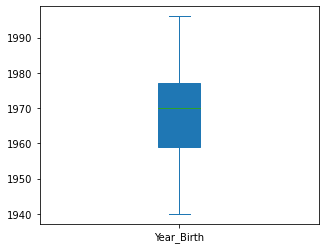

In [13]:
df['Year_Birth'].plot(kind='box', figsize=(5,4), patch_artist=True)

<AxesSubplot:>

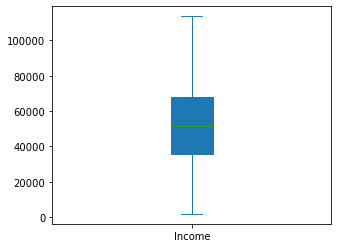

In [14]:
df['Income'].plot(kind='box', figsize=(5,4), patch_artist=True)

In [15]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2229 non-null   int64  
 1   Year_Birth           2229 non-null   int64  
 2   Education            2229 non-null   object 
 3   Marital_Status       2229 non-null   object 
 4   Income               2229 non-null   float64
 5   Kidhome              2229 non-null   int64  
 6   Teenhome             2229 non-null   int64  
 7   Recency              2229 non-null   int64  
 8   MntWines             2229 non-null   int64  
 9   MntFruits            2229 non-null   int64  
 10  MntMeatProducts      2229 non-null   int64  
 11  MntFishProducts      2229 non-null   int64  
 12  MntSweetProducts     2229 non-null   int64  
 13  MntGoldProds         2229 non-null   int64  
 14  NumDealsPurchases    2229 non-null   int64  
 15  NumWebPurchases      2229 non-null   i

In [16]:
col = ['Education','Marital_Status']
for col in col:
    print(df[col].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [17]:
df['Education'] = df['Education'].replace('2n Cycle','Master')
df['Marital_Status'] = df['Marital_Status'].replace('Alone','Single')
df['Marital_Status'] = df['Marital_Status'].replace('YOLO','Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd','Single')
df['Marital_Status'] = df['Marital_Status'].replace('Together','Married')

In [18]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Day,Month,Year
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,3,8,10,4,7,0,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,1,1,2,5,0,0,8,3,2014
2,4141,1965,Graduation,Married,71613.0,0,0,26,426,49,...,1,8,2,10,4,0,0,21,8,2013
3,6182,1984,Graduation,Married,26646.0,1,0,26,11,4,...,2,2,0,4,6,0,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,5,3,6,5,0,0,19,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,2,9,3,4,5,0,0,13,6,2013
2236,4001,1946,PhD,Married,64014.0,2,1,56,406,0,...,7,8,2,5,7,0,0,10,6,2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,1,2,3,13,6,0,0,25,1,2014
2238,8235,1956,Master,Married,69245.0,0,1,8,428,30,...,2,6,5,10,3,0,0,24,1,2014


Treating abnormal values in the categorical column to streamline the data set and renaming the records. 

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2229.0,5589.296097,3244.840538,0.0,2829.0,5455.0,8420.0,11191.0
Year_Birth,2229.0,1968.888739,11.707430,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2229.0,51619.504262,20601.216248,1730.0,35416.0,51381.5,68118.0,113734.0
Kidhome,2229.0,0.444594,0.538636,0.0,0.0,0.0,1.0,2.0
Teenhome,2229.0,0.507402,0.544735,0.0,0.0,0.0,1.0,2.0
Recency,2229.0,49.106326,28.946476,0.0,24.0,49.0,74.0,99.0
MntWines,2229.0,304.991476,336.761943,0.0,24.0,176.0,505.0,1493.0
MntFruits,2229.0,26.348587,39.764060,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2229.0,165.283984,219.336589,0.0,16.0,67.0,231.0,1725.0
MntFishProducts,2229.0,37.642441,54.700548,0.0,3.0,12.0,50.0,259.0


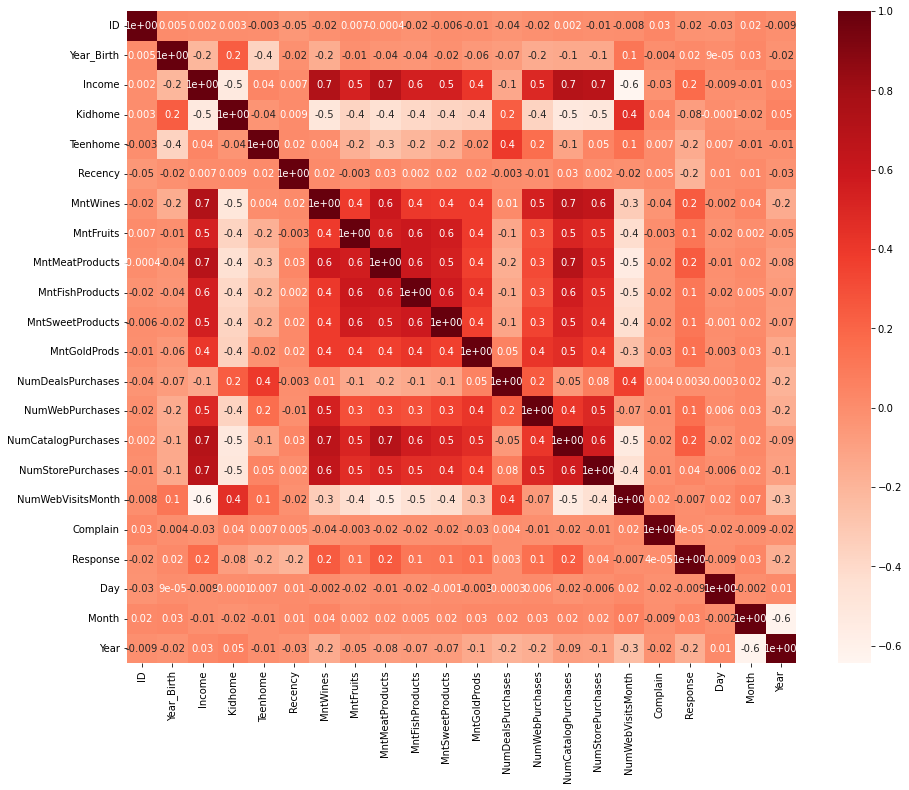

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True,fmt=".1");

## Modelling

### SVM

In [21]:
y=df[['Response']]
X=df.drop(['Response','Education','Marital_Status'],axis=1)
X_train3, X_test3,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=56)

In [22]:
SVM = svm.SVC(kernel='linear')

In [23]:
SVM_Model=SVM.fit(X_train3, y_train.values.ravel())

In [24]:
y_pred = SVM_Model.predict(X_test3)

In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[378,   8],
       [ 54,   6]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       386
           1       0.43      0.10      0.16        60

    accuracy                           0.86       446
   macro avg       0.65      0.54      0.54       446
weighted avg       0.81      0.86      0.82       446



### Logistic Regression

In [27]:
y=df[['Response']]
X=df.drop(['Response','Education','Marital_Status'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=56)

In [28]:
model1 = sm.Logit(y_train, X_train) 
LogModel1 = model1.fit()
print(LogModel1.summary())

Optimization terminated successfully.
         Current function value: 0.327820
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1783
Model:                          Logit   Df Residuals:                     1762
Method:                           MLE   Df Model:                           20
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.2359
Time:                        16:50:09   Log-Likelihood:                -584.50
converged:                       True   LL-Null:                       -764.96
Covariance Type:            nonrobust   LLR p-value:                 2.506e-64
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
ID                  -3.444e-05   2.36e-05     -1.461      0.144   -8.07e-05    1.18e-05
Ye

In [29]:
y_predicted=LogModel1.predict(X_test).round()
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

[[374  12]
 [ 44  16]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       386
           1       0.57      0.27      0.36        60

    accuracy                           0.87       446
   macro avg       0.73      0.62      0.65       446
weighted avg       0.85      0.87      0.85       446



In [30]:
y=df[['Response']]
X=df.drop(['Response','Day','Complain','NumWebPurchases','MntSweetProducts','MntFruits','Year_Birth','Kidhome'
           ,'ID','MntFishProducts','Day','Year','Month','Education','Marital_Status'],axis=1)
X_train1, X_test1,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=56)

In [31]:
model2 = sm.Logit(y_train, X_train1) 
LogModel2 = model2.fit()
print(LogModel2.summary())

Optimization terminated successfully.
         Current function value: 0.343673
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1783
Model:                          Logit   Df Residuals:                     1773
Method:                           MLE   Df Model:                            9
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.1990
Time:                        16:50:09   Log-Likelihood:                -612.77
converged:                       True   LL-Null:                       -764.96
Covariance Type:            nonrobust   LLR p-value:                 3.077e-60
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income              -1.277e-05   5.35e-06     -2.389      0.017   -2.32e-05   -2.29e-06
Te

In [32]:
y_predicted1=LogModel2.predict(X_test1).round()
print(confusion_matrix(y_test, y_predicted1))
print(classification_report(y_test, y_predicted1))

[[374  12]
 [ 45  15]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       386
           1       0.56      0.25      0.34        60

    accuracy                           0.87       446
   macro avg       0.72      0.61      0.64       446
weighted avg       0.85      0.87      0.85       446



In [33]:
y=df[['Response']]
X=df.drop(['Response','Day','Complain','NumWebPurchases','Education','Marital_Status',
           'MntSweetProducts','MntFruits','Year_Birth','Kidhome','ID','MntFishProducts','Day',
           'Year','Month','MntGoldProds','NumWebVisitsMonth'],axis=1)
X_train2, X_test2,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=56)

In [34]:
model3 = sm.Logit(y_train, X_train2) 
LogModel3 = model3.fit()
print(LogModel3.summary())

Optimization terminated successfully.
         Current function value: 0.344430
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1783
Model:                          Logit   Df Residuals:                     1775
Method:                           MLE   Df Model:                            7
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.1972
Time:                        16:50:09   Log-Likelihood:                -614.12
converged:                       True   LL-Null:                       -764.96
Covariance Type:            nonrobust   LLR p-value:                 2.650e-61
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income              -1.054e-05   4.93e-06     -2.139      0.032   -2.02e-05   -8.84e-07
Te

In [35]:
y_predicted2=LogModel3.predict(X_test2).round()
print(confusion_matrix(y_test, y_predicted2))
print(classification_report(y_test, y_predicted2))

[[376  10]
 [ 44  16]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       386
           1       0.62      0.27      0.37        60

    accuracy                           0.88       446
   macro avg       0.76      0.62      0.65       446
weighted avg       0.86      0.88      0.86       446

